In [1]:
!pwd

/media/ebeyerle/seagate/frenkel/ellipsoid/GB/nvt/GB_3_5_2_1/anneal/notebooks


In [2]:
import numpy as np
import matplotlib.pyplot as plt

0.5


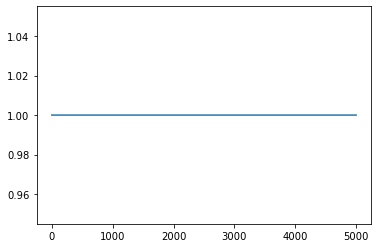

0.7


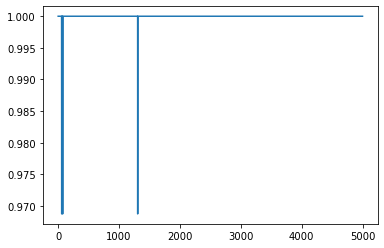

0.8999999999999999


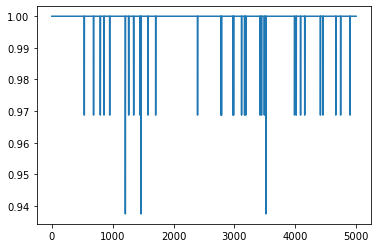

1.0999999999999999


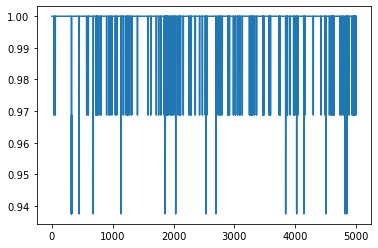

1.2999999999999998


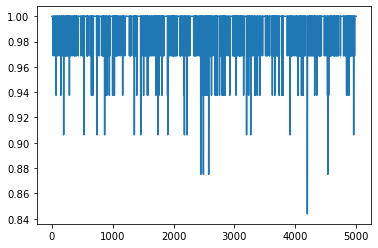

1.4999999999999998


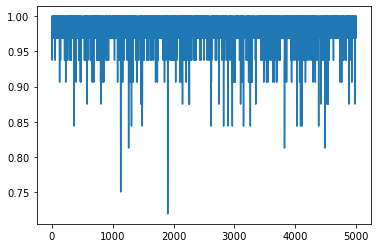

1.6999999999999997


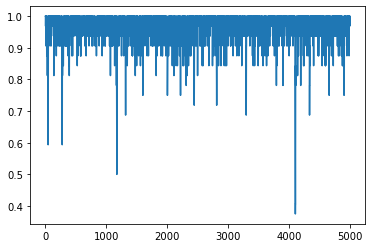

1.8999999999999997


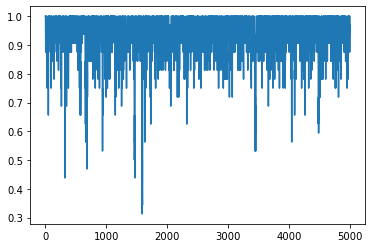

2.0999999999999996


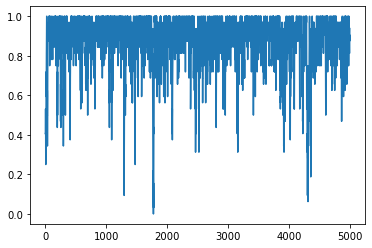

2.3


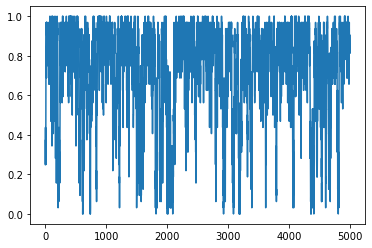

2.4999999999999996


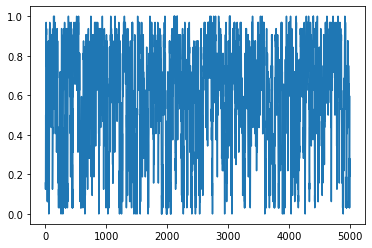

2.6999999999999993


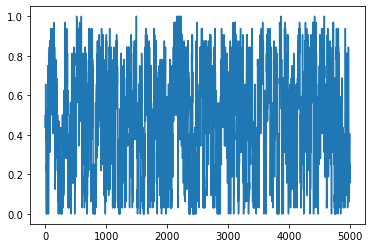

2.8999999999999995


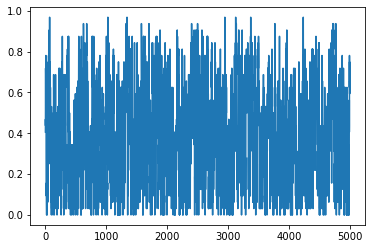

3.0999999999999996


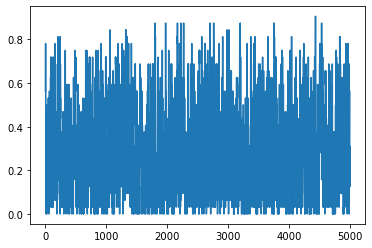

3.2999999999999994


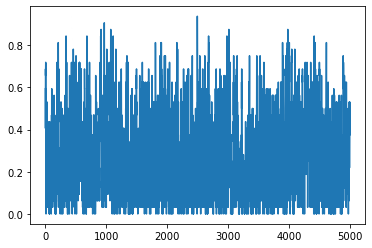

In [3]:
data_list = []
for T in np.arange(0.5, 3.5, 0.2):
    print(T)
    tmp2 = np.load('ising_spins/spins_%sT.npy' % np.round(T, 2))[:]
    tmp2 = np.reshape(tmp2, (tmp2.shape[0], tmp2.shape[1] * tmp2.shape[2]))
    data_list.append(tmp2)
    plt.plot(abs(tmp2.sum(1) / tmp2.shape[1]))
    plt.show()
    plt.close()

In [4]:
data = np.concatenate(data_list, axis = 0)

In [5]:
mag = data.sum(1)

In [7]:
covar = np.matmul((data - data.mean(0)[None,:]).T, (data - data.mean(0)[None,:])) / data.shape[0]

In [8]:
eigvals, eigvecs = np.linalg.eigh(covar)
eigvals = eigvals[::-1]
eigvecs = eigvecs[:,::-1]

In [9]:
PC0 = np.matmul(eigvecs[:,0], data.T)

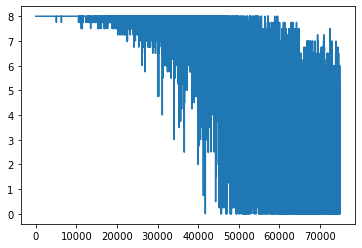

In [10]:
plt.plot(abs(PC0))

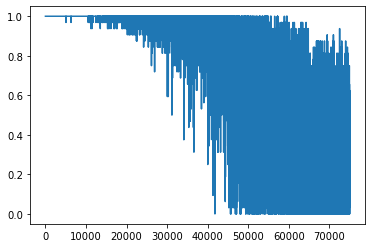

In [11]:
plt.plot(abs(data.sum(1) / data.shape[1]))

In [17]:
eigvecs.mean(0)

array([ 1.24999311e-01,  7.40883135e-05, -5.93110181e-05,  1.12055923e-04,
        2.68830916e-04, -3.71052658e-05, -5.75683636e-05, -5.32417912e-05,
        8.54014062e-05,  8.76550122e-06,  8.00069021e-05,  4.77038185e-06,
       -4.72732108e-05, -8.12129326e-06,  3.32849318e-05,  7.86054598e-05,
       -4.35424387e-05, -6.39640905e-06, -2.82615729e-05, -3.31457542e-05,
       -4.65713386e-06,  2.22288706e-05, -1.59774073e-05, -4.38934411e-06,
        5.86843888e-05, -5.44271017e-05, -1.72421532e-06, -1.17044600e-05,
        1.94219753e-05,  6.68534724e-05, -3.38440732e-05,  7.05780633e-05,
        4.60719804e-06,  3.35674378e-06,  1.98150682e-06,  4.35681286e-06,
        3.93155922e-05,  2.75159290e-05, -3.33029724e-06,  3.08583769e-05,
        2.31826308e-06,  5.62584006e-05,  4.77683661e-05, -2.03090065e-05,
       -3.39232039e-06,  3.46753163e-05,  3.53463136e-05, -1.79325148e-05,
       -5.36060882e-06, -1.48104719e-05,  3.13437727e-05, -4.25090106e-05,
        2.21024299e-07, -

In [19]:
eigvecs[:,0]

array([0.12500164, 0.12506287, 0.12460109, 0.12465491, 0.12383845,
       0.12450667, 0.12433242, 0.1249946 , 0.12513935, 0.12528556,
       0.12453678, 0.12463511, 0.12452803, 0.12500665, 0.12444447,
       0.1248238 , 0.12481958, 0.1245754 , 0.12458731, 0.12457591,
       0.1245121 , 0.12494376, 0.12441866, 0.12478124, 0.12509166,
       0.12550364, 0.1251023 , 0.12493304, 0.12523003, 0.12469403,
       0.1245645 , 0.12511409, 0.1257569 , 0.12510138, 0.12499603,
       0.12529135, 0.12541562, 0.12442832, 0.12470625, 0.12519747,
       0.12568284, 0.12576821, 0.12552711, 0.12527372, 0.12510533,
       0.12505684, 0.12482537, 0.12504454, 0.12510063, 0.12595005,
       0.12559366, 0.12578065, 0.12547668, 0.12459147, 0.12497664,
       0.12505156, 0.12558956, 0.12552819, 0.12534244, 0.12512408,
       0.12493642, 0.12473347, 0.1251088 , 0.1250547 ])

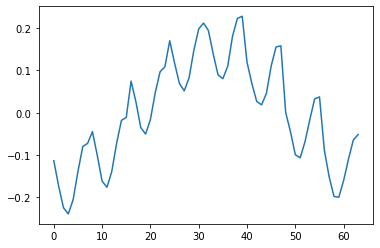

In [16]:
plt.plot(eigvecs[:,2])

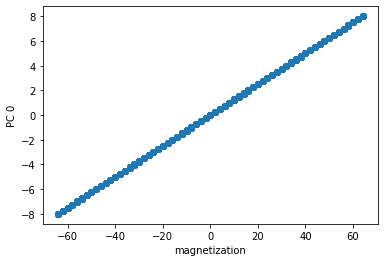

In [51]:
plt.plot(mag, PC0, marker = 'o', lw = 0)
plt.xlabel('magnetization')
plt.ylabel('PC 0')
plt.show()
plt.close()

In [52]:
import torch
import torch.nn as nn

import numpy as np

from tqdm import tqdm
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt

In [53]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [56]:
# Model Hyperparameters

dataset_path = '~/datasets'

cuda = False
DEVICE = torch.device("cpu")


batch_size = 100

x_dim  = 8 * 8
hidden_dim = 1028
latent_dim = 1

lr = 1e-3

epochs = 30

In [57]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split